In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

#### given an input of temperatures in a known and unknown unit, our job is to 
#### design a model to find the relation between the known and unknown unit


In [6]:
#t_c is celsius and u is unknown
t_cn = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_un = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_cn)
t_u = torch.tensor(t_un)

Text(0, 0.5, 'unknown')

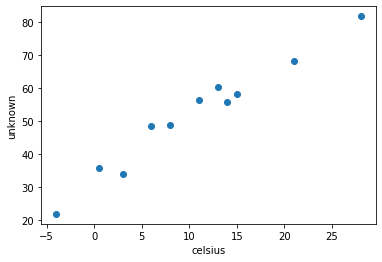

In [12]:
plt.scatter(t_cn, t_un)
plt.xlabel("celsius")
plt.ylabel("unknown")

In [13]:
#we use a linear model to approximate the relationship for now
def model(t_u, w, b):
    return t_u*w + b #w = weights and b = biases

In [14]:
#next we define a loss function to optimise the weights in our model
def loss_fun(t_p, t_c): #t_p is predicted temp in celsius
    squared_diff = (t_p - t_c)**2 #we use squared diff as error measure to resolve the problem of undefined gradient at certain points
    return squared_diff.mean() #baiscally mse

In [15]:
#initalising the parameters and invoking the model
w = torch.ones(())
b = torch.zeros(())
#both above are initialsed as torch scalars, which are zero dimension vectors, hence () in place of dimensions

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [16]:
#checking the loss
loss = loss_fun(t_p, t_c)
loss

tensor(1763.8848)

### Our job now becomes one of how to best estimate 'w' and 'b' to minimize our loss

In [18]:
#declaring a learning rate
delta = 0.1
loss_rate_of_change_w = (loss_fun(model(t_u, w+delta, b), t_c) - loss_fun(model(t_u, w-delta, b), t_c))/(2.0* delta)
#we are figuring out the change loss for a delta unit change in w